In [1]:
%matplotlib inline

In [2]:
import networkx as nx
import preprocessing as prep
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import json
import os
import datetime
import pytz
import matplotlib.pyplot as plt
from collections import Counter
from bb_binary import load_frame_container, Repository
from pandas import Series, DataFrame

In [4]:
G = nx.read_graphml("networks-days/2015-08-21T00:00:00Z_1d_allCams_0.99conf_160dist_6ilen.graphml")

In [5]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 1202
Number of edges: 152449
Average degree: 253.6589


# Closeness VS RGG

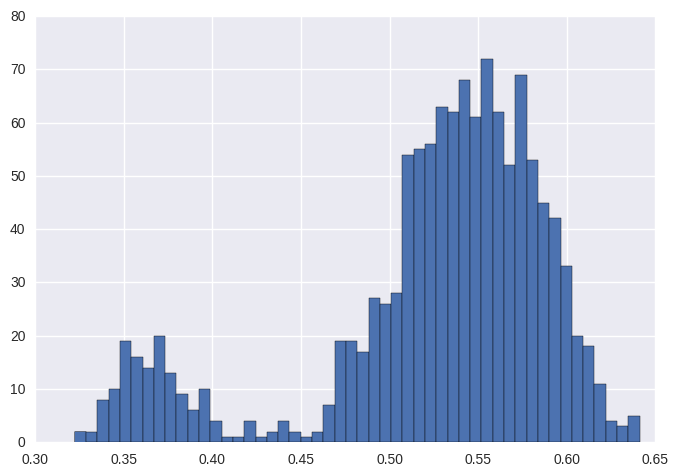

In [6]:
closenessc = nx.closeness.closeness_centrality(G)
Series(closenessc).hist(bins=50)

In [ ]:
# rgg = nx.random_geometric_graph(len(G.nodes()), 0.053)

In [ ]:
# rgg_closenessc = nx.closeness.closeness_centrality(rgg)
# Series(rgg_closenessc).hist(bins=50)

# Grenze bei 0.45

In [7]:
line = 0.45
s = Series(closenessc)
smaller = s[s < line]
bigger = s[s > line]
IDsmaller = [int(i) for i in smaller.index]
IDbigger = [int(i) for i in bigger.index] 

# Positionsdaten pro Biene rausfischen für linken und rechten Berg und plotten

In [9]:
import sqlite3

In [10]:
db_path = "/storage/mi/aschle/data.db"
conn = sqlite3.connect(db_path)
c = conn.cursor()

In [19]:
def plotClosenessXY(txt, df, camIDleft, camIDright, s=5000):
    data_l = df[df.CAM_ID == camIDleft].sample(s)
    data_r = df[df.CAM_ID == camIDright].sample(s)
    data_r.XPOS = data_r.XPOS + 3000
    data = pd.concat([data_l,data_r])
    data.plot.scatter(x='XPOS', y="YPOS",s=1, xlim=(0,6000),ylim=(0,4000), alpha=0.2)
    plt.axes().set_aspect('equal')
    plt.axes().set_title("{} \nCam {} & Cam {}".format(txt, str(camIDleft), str(camIDright)))

In [13]:
def getDFwithIDS(ids, conn):
    ids_str = ', '.join([str(x) for x in ids])
    sql = '''
        SELECT d.XPOS, d.YPOS, d.ID, fc.CAM_ID
        FROM DETECTIONS d
        INNER JOIN FRAME f
        ON d.FRAME_ID=f.FRAME_ID
        INNER JOIN FRAME_CONTAINER fc
        ON f.FC_ID=fc.FC_ID
        WHERE d.ID IN ({});
    '''.format(ids_str)
    return pd.read_sql(sql, conn)

In [14]:
df_s = getDFwithIDS(IDsmaller, conn)

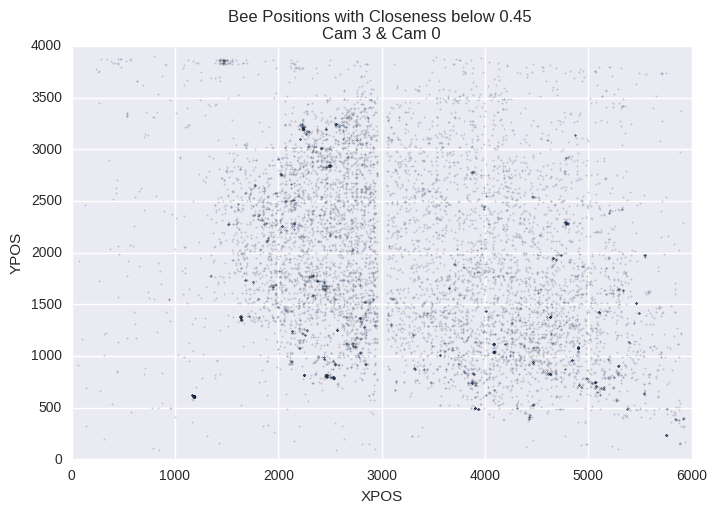

In [20]:
plotClosenessXY("Bee Positions with Closeness below 0.45", df_s, 3, 0)

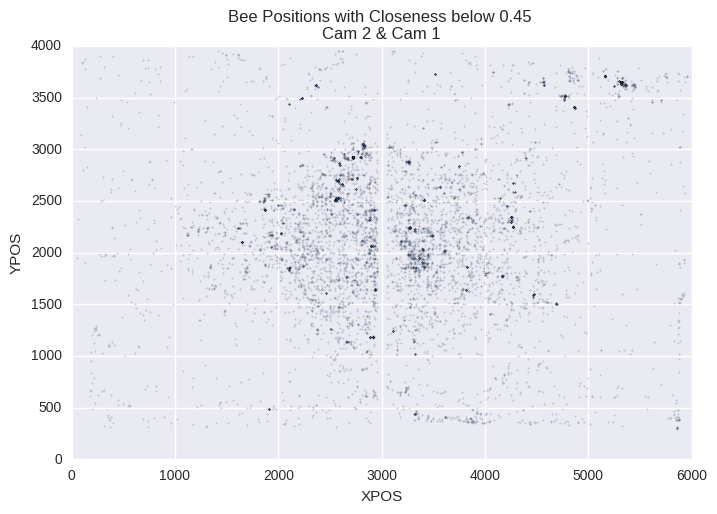

In [25]:
plotClosenessXY("Bee Positions with Closeness below 0.45", df_s, 2, 1, s=4000)

In [21]:
df_b = getDFwithIDS(IDbigger, conn)

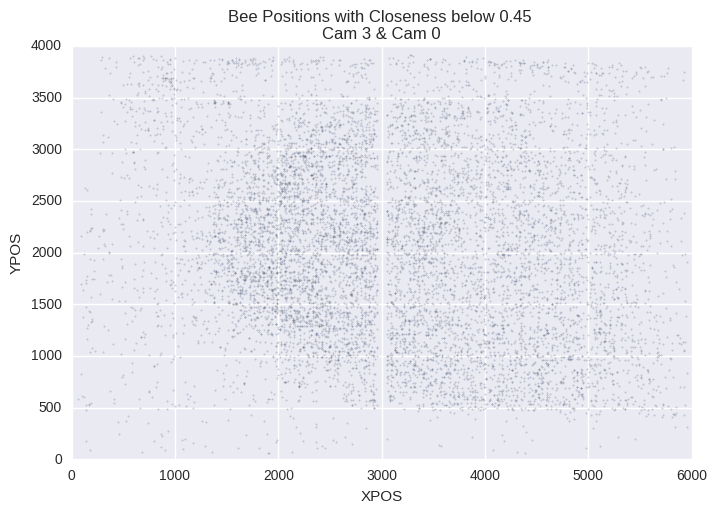

In [22]:
plotClosenessXY("Bee Positions with Closeness below 0.45", df_b, 3, 0)

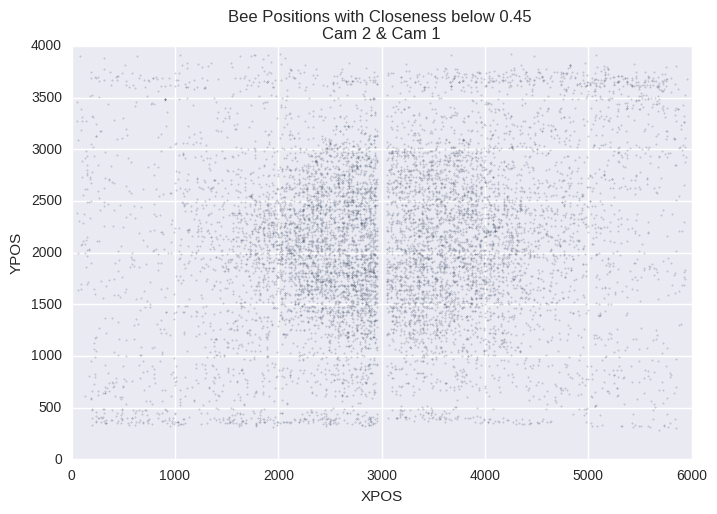

In [26]:
plotClosenessXY("Bee Positions with Closeness below 0.45", df_b, 2, 1)

# Heatmap

In [27]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

In [226]:
def plotHeatmapXY(txt, df, camIDleft, camIDright, s=5000):
    data_l = df[df.CAM_ID == camIDleft].sample(s)
    data_r = df[df.CAM_ID == camIDright].sample(s)
    data_r.XPOS = data_r.XPOS + 3000

    data = pd.concat([data_l,data_r])
    x = data.XPOS
    y = data.YPOS
    
#     heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
#     extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
#     plt.clf()
#     plt.imshow(heatmap.T, extent=extent, origin='lower')
#     plt.show()
    
#     plt.hexbin(x,y)
#     plt.show()

    H, xedges, yedeges, im = plt.hist2d(x,y,bins=[60,40], cmap='jet', vmin = 0, vmax = 130)
    plt.colorbar()
    plt.axes().set_title("{} \nCam {} & Cam {}".format(txt, str(camIDleft), str(camIDright)))
    
    return H
#     data.plot.scatter(x='XPOS', y="YPOS",s=1, xlim=(0,6000),ylim=(0,4000), alpha=0.2)
#     plt.axes().set_aspect('equal')
#     plt.axes().set_title("{} \nCam {} & Cam {}".format(txt, str(camIDleft), str(camIDright)))

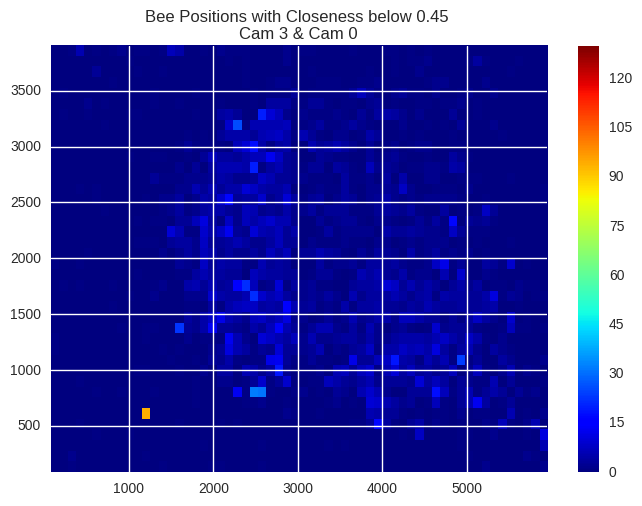

In [227]:
H = plotHeatmapXY("Bee Positions with Closeness below 0.45", df_s, 3, 0, s=2000)

In [228]:
H.max()

94.0

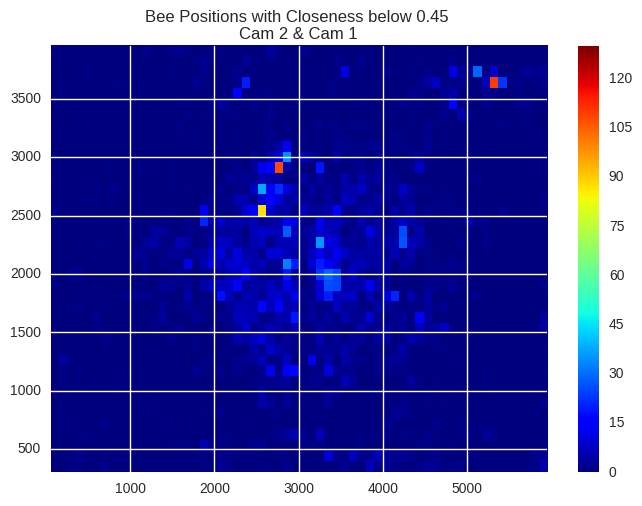

In [229]:
H = plotHeatmapXY("Bee Positions with Closeness below 0.45", df_s, 2, 1, s=2000)

In [230]:
H.max()

110.0

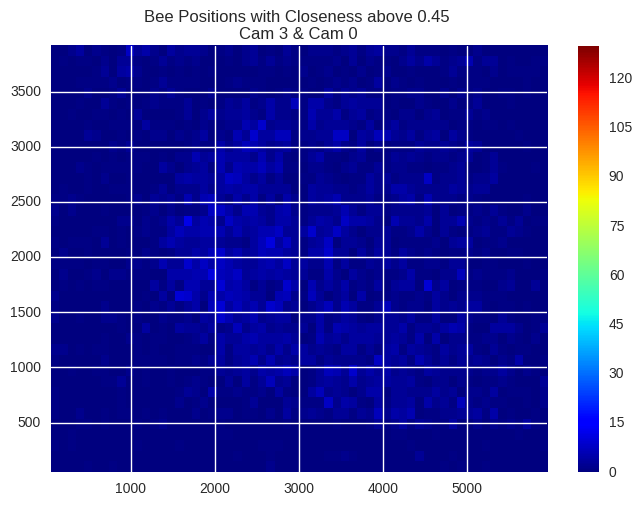

In [231]:
H = plotHeatmapXY("Bee Positions with Closeness above 0.45", df_b, 3, 0, s=2000)

In [232]:
H.max()

12.0

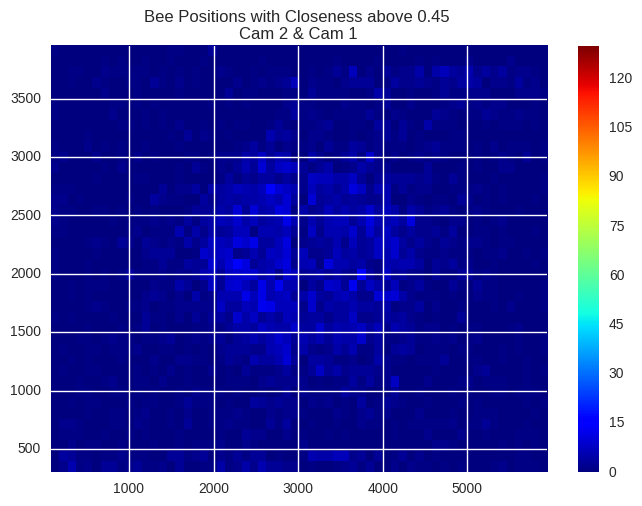

In [233]:
H = plotHeatmapXY("Bee Positions with Closeness above 0.45", df_b, 2, 1, s=2000)

In [225]:
H.max()

39.0